## Physics 3. Laboratory experiment #3. Microwaves.

Dr. Ernst Uzhansky, 2024, v0.1.1

Outline of the lab:

#### Day 1

1. Lattice as a polarizer
2. Waveguide (galbo) features

#### Day 2

3. Michelson interferometer
4. Fabry-Peroh interferometer
5. Lloyd interferometer

## Import libraries

In [1]:
import numpy as np  # math functions
import scipy  # scientific functions
import matplotlib.pyplot as plt  # for plotting figures and setting their properties
import pandas as pd  # handling data structures (loaded from files)
from scipy.stats import linregress  # contains linregress (for linear regression)
from scipy.optimize import curve_fit as cfit  # non-linear curve fitting
from sklearn.metrics import r2_score  # import function that calculates R^2 score
# from prettytable import PrettyTable 		# display data in visually table format
import scipy.ndimage as ndimage  # import Multidimensional Image processing package
from scipy.signal import find_peaks  # for find local peaks in a signal

### Part 1. Lattice as a polarizer

Place the detector in front of the transmitter, measure and plot the radiation intensity received by the detector for the following two cases:
1. Without a lattice between the transmitter and the detector
2. With a grating between the transmitter and the detector

Keep in mind that lettice acts as a filter and, technally, it can be considered as a source of polarized microwaves. That is why you have $cos^{4}$ dependence, namely $cos^{2}$ dependence from the source to the lettice, and one more $cos^{2}$ dendence from the lettice to the receiver.

Mind that every graduation mark on the back of the source and receiver correspond to 5 degrees.

**Figure 1.** Intensity vs $cos^2(\theta)$. Case without a polarizer.


[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180.]
Linear fit: slope=0.367194, intercept=0.099024, R^2=0.898288


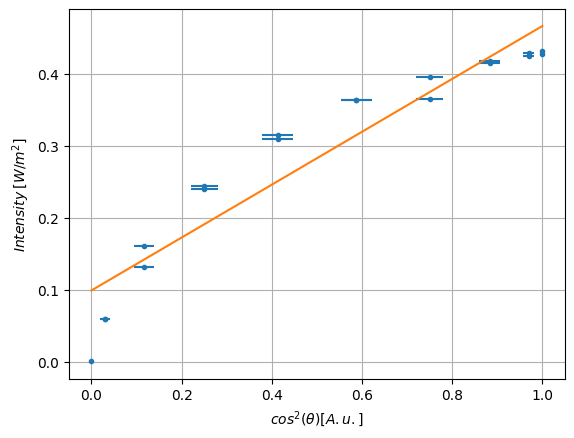

In [2]:
angleoffset = 0
angles2 = np.linspace(0, 180, 19) + angleoffset  # +-4, deg
print(angles2)
intensity2 = np.array((431, 429, 418, 396, 364, 309, 244, 132, 59, 0.6, 59.3, 161, 240.5, 315,363,365,415,424,428)) / 1000  # ±1e-3, Volt

rad_angles2 = np.deg2rad(angles2)
data2 = np.cos(rad_angles2) ** 2
plt.style.use('default')
delta_theta_deg = 2  # measurement uncertainty in degrees (adjust if different)
delta_theta_rad = np.deg2rad(delta_theta_deg)
# propagate angle uncertainty to x (cos^2) using derivative d(cos^2)/dθ = -2 cos(θ) sin(θ)
xerr = np.abs(-2 * np.cos(rad_angles2) * np.sin(rad_angles2)) * delta_theta_rad
yerr = np.full_like(intensity2, 1e-3)
plt.figure()
plt.grid()
plt.errorbar(x=data2, y=intensity2, xerr=xerr, yerr=yerr, fmt='.')
# Linear regression for intensity2 vs data2 and print R^2
slope, intercept, r_value, p_value, stderr = linregress(data2, intensity2)
pred = slope * data2 + intercept
r2 = r_value ** 2
print(f"Linear fit: slope={slope:.6f}, intercept={intercept:.6f}, R^2={r2:.6f}")
# plot fit line
x_fit = np.linspace(data2.min(), data2.max(), 100)
plt.plot(x_fit, slope * x_fit + intercept, '-', label=f'fit $R^2$={r2:.3f}')
plt.xlabel("$cos^2(\\theta) [A.u.]$")
plt.ylabel("$Intensity_ [W/m^2]$");

**Figure 2.** Intensity vs $sin^4(\theta)$. Case with a polarizer between the source and the receiver.


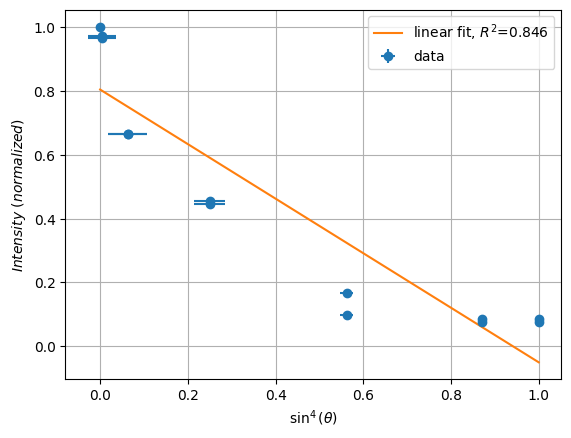

In [3]:
angles = np.linspace(0,180,13)  # +-2, deg
angle_err = 2  # degrees
intensity = np.array(
    (35, 35, 69, 185, 275, 400, 414, 403, 275, 189, 41, 31, 31)) / 1000  # ±1e-3, Volt
intensity_err = 1e-3
intensity_err_raw = 1e-3  # measurement uncertainty in Volts
max_intensity = intensity.max()
intensity_norm = intensity / max_intensity
intensity_err = intensity_err_raw / max_intensity
intensity /= max_intensity
# intensity = np.power(voltage, 2) # Volts
data = np.power(np.cos(angles * np.pi / 180), 4)

rad = np.deg2rad(angles)
plt.style.use('default')

data = np.cos(rad) ** 4

# propagate angle uncertainty to x (data) using derivative d(cos^4)/dθ = -4 cos^3(θ) sin(θ) * dθ (radians)
xerr = np.abs(4 * np.sin(rad) ** 3 * np.cos(rad)) * np.deg2rad(angle_err)

# linear regression and R^2
slope, intercept, r_value, p_value, stderr = linregress(data, intensity_norm)
r2 = r_value ** 2
x_fit = np.linspace(data.min(), data.max(), 200)
y_fit = slope * x_fit + intercept

plt.figure()
plt.grid()
plt.errorbar(data, intensity_norm, xerr=xerr, yerr=intensity_err, fmt='o', label='data')
plt.plot(x_fit, y_fit, '-', label=f'linear fit, $R^2$={r2:.3f}')
plt.xlabel("$\\sin^4(\\theta)$")
plt.ylabel("$Intensity\\ (normalized)$")
plt.legend()

### Part 2. Waveguide (galbo) features

Assemble the waveguide device and make measurements according to the instruction list.

**Figure 3.** Perpendicular case. Intensity vs width of the waveguide.

Adjacent fit: slope=10.937951, intercept=-0.048427, R^2=0.325999


Text(0, 0.5, 'Intensity [W/m^2]')

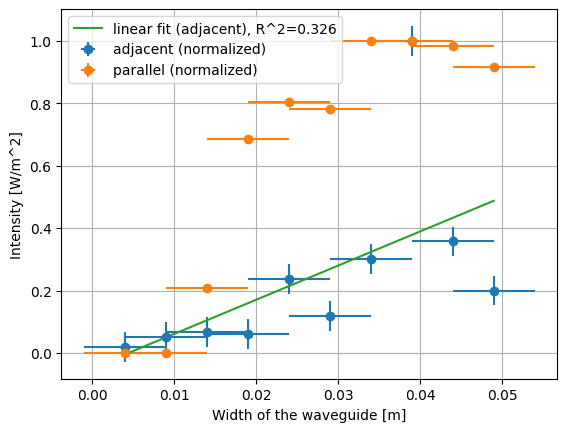

In [4]:
#Perpendicular case
d = (np.array([5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5])-.1) * 1e-2  # ±0.5e-3, metres
d_err = 5e-3
intensity_adjacent_raw = np.array([4.2, 7.5, 21, 6.3, 2.5, 5, 1.3, 1.4, 1.1, 0.4]) *1e-3 # ±1e-3, Volts // perpendicular

intensity_parallel_raw = np.array([468, 503, 511, 511, 400, 410, 350, 106, 0.14, 0.1])  # ±1e-3, Volts
int_err_raw = 1e-3  # 1 mV

# normalize each series by its max (as in original)
intensity_adjacent = intensity_adjacent_raw / intensity_adjacent_raw.max()
intensity_parallel = intensity_parallel_raw / intensity_parallel_raw.max()
plt.style.use('default')

# propagated measurement uncertainty after normalization
intensity_err_adj = int_err_raw / intensity_adjacent_raw.max()
intensity_err_par = int_err_raw / intensity_parallel_raw.max()

plt.grid()
plt.errorbar(d, intensity_adjacent, xerr=d_err, yerr=intensity_err_adj, fmt='o', label='adjacent (normalized)')
plt.errorbar(d, intensity_parallel, xerr=d_err, yerr=intensity_err_par, fmt='o', label='parallel (normalized)')

# Linear regression for parallel case (normalized)
slope, intercept, r_value, p_value, stderr = linregress(d, intensity_adjacent)
r2 = r_value ** 2
x_fit = np.linspace(d.min(), d.max(), 100)
plt.plot(x_fit, slope * x_fit + intercept, '-', label=f'linear fit (adjacent), R^2={r2:.3f}')

plt.xlabel('Width of the waveguide [m]')
plt.ylabel('Intensity [W/m^2]')
plt.legend()
print(f"Adjacent fit: slope={slope:.6f}, intercept={intercept:.6f}, R^2={r2:.6f}")
plt.xlabel('Width of the waveguide [m]')
plt.ylabel('Intensity [W/m^2]')

part with plastic

-0.7745116555385473 1140.649295715244 0.0939008749877511
[0.03266667 0.036      0.0375     0.06133333]
lambda_g = 2.96090130683669 ± 0.08327933053448938 cm


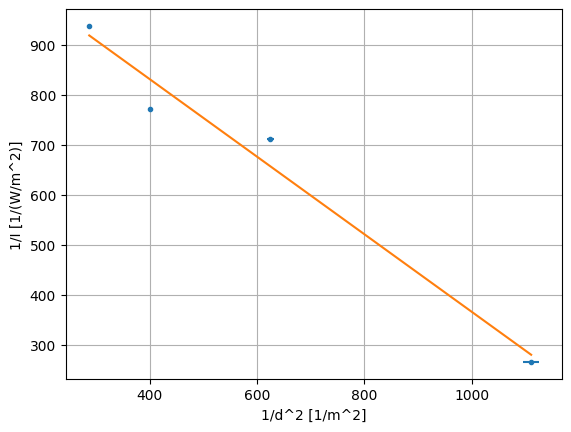

In [8]:
d = np.array([2.95, 2.5, 2, 1.5]) * 1e-2  # ±1e-4, metres
d_err = 1e-4  # Uncertainty in d for 'd'

max1 = np.mean(np.diff(np.array([3.3,4.9,6.4,8.1,9.9,11.3,13.1]) * 1e-2))  # ±2e-2,
max2 = np.mean(np.diff(np.array([1.5, 3, 4.7, 6.9]) * 1e-2))
max3 = np.mean(np.diff(np.array([3.4, 5.3, 7.2, 9.1, 10.9]) * 1e-2))
max4 = np.mean(np.diff(np.array([1.8, 4.9, 8, 11]) * 1e-2))

data_raw_err = 2e-2  # Uncertainty in the raw max values
data = np.array([max1, max2, max3, max4]) * 2
data_err = data_raw_err * 2  # Propagated uncertainty for 'data'

x_values = 1 / ((2 * d) ** 2)
y_values = 1 / (data ** 2)

# Calculate xerror using error propagation for x = 1/(4d^2)
xerr_values = np.abs(-1 / (2 * d ** 3)) * d_err

regress = linregress(x_values,y_values)
slope = regress.slope
intercept = regress.intercept
stderr = regress.stderr
intercept_stderr = regress.intercept_stderr

plt.style.use('default')


print(slope, intercept, stderr)

print(data)
plt.figure()
plt.errorbar(x_values, y_values, xerr=xerr_values, yerr=stderr, fmt='.')
plt.plot(x_values, slope * x_values + intercept)
plt.xlabel('1/d^2 [1/m^2]')
plt.ylabel('1/I [1/(W/m^2)]')
plt.grid()
lam_g = 1/np.sqrt(intercept)
lam_g_err = 0.5*intercept**(-1.5)*intercept_stderr
print("lambda_g =", lam_g*1e2, "±", lam_g_err*1e2, "cm")

### Day 2. Building interferometers.

In [ ]:
# Michelson interferometer

x0 = 0.1;  # initial distance [m]
dists_max = np.array([0.105, 0.115])  # ±1e-3 m
V_max = np.array([0.185, 0.054])  # ±4e-3 Volt

plt.errorbar(dists_max, V_max, xerr=0.005, yerr=0.005, fmt="bo", label="meas")
plt.xlabel("Distance [m]")
plt.ylabel("Voltage [V]")
plt.legend()
plt.grid()
plt.show()

# Calculate wavelength according to the instruction list (תדריך):


**Figure .** Michelson interferometer. Voltage vs. distance.

In [ ]:
# Fabry-Perot interferometer
mirror_1_d1 = 1  # ±1e-3 m
mirror_1_d2 = 1  # ±1e-3 m
mirror_2 = 1  # ±1e-3 m

d11 = mirror_1_d1 - mirror_2
d21 = mirror_1_d2 - mirror_2

dist1 = mirror_1_d2 - mirror_1_d1
lamb_1 = dist1 / 5  # 10 wavelengths, and the mirror moved half as much as the added path

print('Wavelength measured with Fabry-Perot interferometer is', lamb_1 * 1e2, ' cm')


In [ ]:
##%% Loyd Second meas
AC = 0.86  #meter
h_3 = 0.1415
values_around_min1_dis = np.array([0.103, 0.111])  # +-0.005 meters

values_around_min1_int = np.array([0.13, 0.151])  # Volts

plt.errorbar(values_around_min1_dis, values_around_min1_int, xerr=0.005, yerr=0.005, fmt="bo", label="meas")
plt.xlabel("Distance [m]")
plt.ylabel("Voltage [V]")
plt.title(label="intesity as a function of the distance 1")
plt.legend()
plt.grid()
plt.show()
AB_3 = (((AC / 2) ** 2) + (h_3 ** 2)) ** 0.5
lambda_L3 = ((AC - 2 * AB_3) * 0.5) * -(10 ** 2)
print('Wavelength measured with Loyd mirror is', lambda_L3, ' cm')